# Image Denoising Challenge

The goal for this challenge is to leverage your knowledge of Deep Learning to design and train a denoising model. For a given noisy image $X$, our model should learn to predict the denoised image $y$.


**Objectives**
- Visualize images
- Preprocess images for the neural network
- Fit a custom CNN for the task

## 1. Load Data

👉 Let's download the dataset archive.
It contains RGB and Black & White images we will be using for the rest of this challenge.

In [1]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/paintings.zip > paintings.zip
! unzip -nq "paintings.zip" 
! rm "paintings.zip"
! ls -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90.1M  100 90.1M    0     0   855k      0  0:01:47  0:01:47 --:--:--  972k0:03  0:01:56  772k 0:01:48  0:01:38  0:00:10  744k
total 84
-rw-rw-r-- 1 juliend juliend 21349 Jun 30 09:08 image_denoising.ipynb
drwx------ 2 juliend juliend 57344 Jun  9 15:06 paintings
-rw-rw-r-- 1 juliend juliend     0 Jun 29 09:16 README.md
drwxrwxr-x 2 juliend juliend  4096 Jun 29 09:16 tests


In [8]:
import glob
from PIL import Image
from matplotlib.pyplot import imshow

In [6]:
dataset_paths = glob.glob("./paintings/*.jpg")
dataset_paths

['./paintings/Pierre-Auguste_Renoir_317.jpg',
 './paintings/Albrecht_Duâ\x95\xa0Ãªrer_323.jpg',
 './paintings/Edouard_Manet_8.jpg',
 './paintings/Alfred_Sisley_60.jpg',
 './paintings/Pieter_Bruegel_95.jpg',
 './paintings/Vincent_van_Gogh_233.jpg',
 './paintings/Paul_Gauguin_180.jpg',
 './paintings/Edgar_Degas_653.jpg',
 './paintings/Albrecht_DuÌ\x88rer_78.jpg',
 './paintings/Edgar_Degas_279.jpg',
 './paintings/Diego_Rivera_69.jpg',
 './paintings/Salvador_Dali_123.jpg',
 './paintings/Pieter_Bruegel_66.jpg',
 './paintings/Francisco_Goya_29.jpg',
 './paintings/Pablo_Picasso_258.jpg',
 './paintings/Vincent_van_Gogh_796.jpg',
 './paintings/Pierre-Auguste_Renoir_122.jpg',
 './paintings/Albrecht_DuÌ\x88rer_288.jpg',
 './paintings/Vincent_van_Gogh_103.jpg',
 './paintings/El_Greco_70.jpg',
 './paintings/Titian_102.jpg',
 './paintings/Mikhail_Vrubel_62.jpg',
 './paintings/Vincent_van_Gogh_695.jpg',
 './paintings/Claude_Monet_6.jpg',
 './paintings/Albrecht_DuÌ\x88rer_136.jpg',
 './paintings/

❓ **Display the image at index `53` of this dataset_paths (i.e the 54-th image)**

<details>
    <summary>Hint</summary>
    Use the <code>PIL.Image.open</code> and <code>matplotlib.pyplot.imshow</code> functions.
</details>

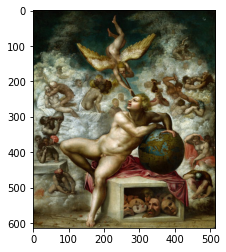

In [62]:
# YOUR CODE HERE
im = Image.open(dataset_paths[53])
imshow(im)

❓ **What is the shape of the image you displayed above `img_shape`?  How many dimensions `img_dim` does it have ?**

In [17]:
# YOUR CODE HERE
img_shape = im.size
img_dim = 2

❓ **What was in the image above?**

In [18]:
img_shape = img_shape
img_dim = img_dim

# Uncomment the correct answer

is_portrait = True
#is_portrait = False

is_colored_image = True
#is_colored_image = False

In [19]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_loading',
    img_shape=img_shape,
    img_dim=img_dim,
    is_portrait=is_portrait,
    is_colored_image=is_colored_image
)

result.write()

## 2. Processing

❓ **Store all images from the dataset folder in a list of numpy arrays called `dataset_images`**

- It can take a while
- If the dataset is too big to fit in memory, just take the first half (or quarter) of all pictures

In [20]:
import numpy as np

In [41]:
# YOUR CODE HERE
dataset_images = []
i = 0
for img in dataset_paths:
    image = Image.open(dataset_paths[i])
    i += 1
    dataset_images.append(np.array(image))

### 2.1 Reshape, Resize, Rescale

Let's simplify our dataset and convert it to a single numpy array

❓ **First, check if that all the images in the dataset have the same number of dimensions**.
- What do you notice?
- How do you explain it? 

In [60]:
# YOUR CODE HERE
for i in range(20):
    print(dataset_images[i].shape)

(1198, 881, 3)
(614, 420, 3)
(715, 559, 3)
(640, 528, 3)
(547, 708)
(614, 512, 3)
(578, 442, 3)
(655, 754, 3)
(461, 377, 3)
(633, 623, 3)
(480, 315, 3)
(480, 596, 3)
(573, 720, 3)
(761, 510, 3)
(486, 356, 3)
(614, 762, 3)
(685, 540, 3)
(1069, 1536)
(614, 461, 3)
(484, 362, 3)


In [ ]:
# Not all the images have the same shape, some have 3 (colored images) dimensions 
# and some have 2 dimensions only (black and white)

👉 We convert for you all black & white images into 3-colored ones by duplicating the image on three channels, so as to have only 3D arrays

In [66]:
from tqdm import tqdm

In [67]:
dataset_images = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in tqdm(dataset_images)]
set([x.ndim for x in dataset_images])

100%|██████████| 1085/1085 [00:00<00:00, 1850.08it/s]


{3}

❓ **What about their shape now ?**
- Do they all have the same width/heights ? If not:
- Resize the images (120 pixels height and 100 pixels width) in the dataset, using `tensorflow.image.resize` function.
- Now that they all have the same shape, store them as a numpy array `dataset_resized`.
- This array should thus be of size $(n_{images}, 120, 100, 3)$

In [68]:
# YOUR CODE HERE
for i in range(20):
    print(dataset_images[i].shape)

(1198, 881, 3)
(614, 420, 3)
(715, 559, 3)
(640, 528, 3)
(547, 708, 3)
(614, 512, 3)
(578, 442, 3)
(655, 754, 3)
(461, 377, 3)
(633, 623, 3)
(480, 315, 3)
(480, 596, 3)
(573, 720, 3)
(761, 510, 3)
(486, 356, 3)
(614, 762, 3)
(685, 540, 3)
(1069, 1536, 3)
(614, 461, 3)
(484, 362, 3)


In [93]:
from tensorflow.image import resize

In [74]:
for i in range(len(dataset_images)):
    dataset_images[i] = resize(dataset_images[i], [120,100])

In [75]:
for i in range(20):
    print(dataset_images[i].shape)

(120, 100, 3)
(120, 100, 3)
(120, 100, 3)
(120, 100, 3)
(120, 100, 3)
(120, 100, 3)
(120, 100, 3)
(120, 100, 3)
(120, 100, 3)
(120, 100, 3)
(120, 100, 3)
(120, 100, 3)
(120, 100, 3)
(120, 100, 3)
(120, 100, 3)
(120, 100, 3)
(120, 100, 3)
(120, 100, 3)
(120, 100, 3)
(120, 100, 3)


In [100]:
dataset_resized = np.stack(dataset_images)
dataset_resized.shape

(1085, 120, 100, 3)

❓ **Rescale the data of each image between $0$ and $1$**
- Save your resulting list as `dataset_scaled`

In [146]:
# YOUR CODE HERE
dataset_scaled = dataset_resized/255

In [147]:
dataset_scaled.shape

(1085, 120, 100, 3)

### 2.2 Create (X,y) sets

👉 Now, we'll add for you some **random noise** to our images to simulate noise (that our model will try to remove later)

In [149]:
NOISE_LEVEL = 0.2

dataset_noisy = np.clip(
    dataset_scaled + np.random.normal(
        loc=0,
        scale=NOISE_LEVEL,
        size=dataset_scaled.shape
    ).astype(np.float32),
    0,
    1
)
dataset_noisy.shape

(1085, 120, 100, 3)

❓ **Plot a noisy image below to visualize the noise and compare it with the normal one**

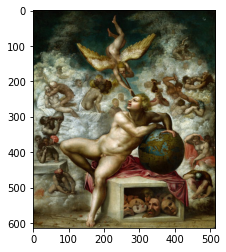

In [161]:
# YOUR CODE HERE
imshow(Image.open(dataset_paths[53]))

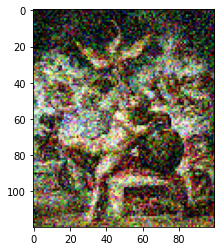

In [162]:
imshow(dataset_noisy[53])

❓ **Create your `(X_train, Y_train)`, `(X_test, Y_test)` training set for your problem**

- Remember you are trying to use "noisy" pictures in order to predict the "normal" ones.
- Keeping about `20%` of randomly sampled data as test set

In [170]:
# YOUR CODE HERE
idx_train =  np.random.choice(len(dataset_noisy), round(len(dataset_noisy)))

array([[[0.7164683 , 0.4121943 , 0.4550523 ],
        [0.66327834, 0.62030864, 0.99950105],
        [0.7120556 , 0.606284  , 0.7217594 ],
        ...,
        [0.79465544, 0.8534659 , 0.7438376 ],
        [1.        , 0.5450386 , 0.46293846],
        [1.        , 0.7438097 , 0.62695754]],

       [[0.94169134, 0.7476245 , 0.5119594 ],
        [0.489732  , 0.2743513 , 0.6195115 ],
        [0.8923077 , 0.20242643, 0.3947066 ],
        ...,
        [0.8704555 , 0.3766365 , 0.6980471 ],
        [0.93164927, 0.64070797, 0.64715207],
        [0.72673476, 0.49086332, 0.6103892 ]],

       [[0.84788597, 1.        , 0.756801  ],
        [0.8896158 , 0.66793084, 0.6339472 ],
        [0.59620917, 0.97702   , 0.5848839 ],
        ...,
        [0.76056075, 0.72037   , 0.84090495],
        [0.64936244, 0.76937217, 0.7395327 ],
        [0.9731332 , 0.64655375, 0.6349735 ]],

       ...,

       [[0.54926574, 0.46242973, 0.3943472 ],
        [0.0621945 , 0.        , 0.30085537],
        [0.41133764, 0

In [573]:
from nbresult import ChallengeResult
result = ChallengeResult(
    "preprocessing",
    X_train_shape = X_train.shape,
    Y_train_shape = Y_train.shape,
    X_std = X_train[:,:,:,0].std(),
    Y_std = Y_train[:,:,:,0].std(),
    first_image = Y_train[0]
)
result.write()

## 3. Convolutional Neural Network

A commonly used neural network architecture for image denoising is the __AutoEncoder__.

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

Its goal is to learn a compact representation of your data to reconstruct them as precisely as possible.  
The loss for such model must incentivize it to have __an output as close to the input as possible__.

For this challenge, __you will only be asked to code the Encoder part of the network__, since building a Decoder leverages layers architectures you are not familiar with (yet).

👉 Run this code below if you haven't managed to build your own (X,Y) training sets. This will load them as solution

```python
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle
```

In [21]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)

! rm data_painting_solution.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  298M  100  298M    0     0   755k      0  0:06:43  0:06:43 --:--:--  843k  850k      0  0:05:58  0:01:18  0:04:40  822k


### 3.1 Architecture

👉 Run the cell below that defines the decoder

In [575]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Sequential

In [576]:
# We choose to compress images into a latent_dimension of size 6000
latent_dimensions = 6000

# We build a decoder that takes 1D-vectors of size 6000 to reconstruct images of shape (120,100,3)
decoder = Sequential(name='decoder')
decoder.add(layers.Reshape((30, 25, 8), input_dim=latent_dimensions))
decoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))
decoder.summary()

❓ **Now, build the `encoder` that plugs correctly with the decoder defined above**. Make sure that:
- The output of your `encoder` is the same shape as the input of the `decoder`
- Use a convolutional neural network architecture without transfer learning
- Keep it simple
- Print model summary

In [577]:
# CODE HERE YOUR ENCODER ARCHITECTURE AND PRINT IT'S MODEL SUMMARY

encoder = None

👉 **Test your encoder below**

In [579]:
# HERE WE BUILD THE AUTO-ENCODER (ENCODER + DECODER) FOR YOU. IT SHOULD PRINT A NICE SUMMARY
from tensorflow.keras.models import Model

x = layers.Input(shape=(120, 100, 3))
autoencoder = Model(x, decoder(encoder(x)), name="autoencoder")
autoencoder.summary()

### 3.2 Training

❓ **Before training the autoencoder, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "stupid" case where you don't manage to de-noise anything at all.
- Store the result under `score_baseline`

In [580]:
# YOUR CODE HERE

❓ Now, **train your autoencoder**

- Use an appropriate loss
- Adapt the learning rate of your optimizer if convergence is too slow/fast
- Make sure your model does not overfit with appropriate control techniques

💡 You will not be judged by the computing power of your computer, you can reach decent performance in less than 5 minutes of training without GPUs.

In [581]:
# YOUR CODE HERE

❓ **Plot your training and validation loss at each epoch using the cell below**

In [583]:
# Plot below your train/val loss history
# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE


# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
plt.savefig("tests/history.png")

❓ **Evaluate your performances on test set**
- Compute your de-noised test set `Y_pred` 
- Store your test score as `score_test`
- Plot a de-noised image from your test set and compare it with the original and noisy one using the cell below

In [585]:
# YOUR CODE HERE

In [591]:
# RUN THIS CELL TO CHECK YOUR RESULTS
idx = 0

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(Y_test[idx])
axs[0].set_title("Clean image.")

axs[1].imshow(X_test[idx])
axs[1].set_title("Noisy image.")

axs[2].imshow(Y_pred[idx])
axs[2].set_title("Prediction.")

# Run this to save your results for correction
plt.savefig('tests/image_denoised.png')

🧪 **Send your results below**

In [588]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "network",
    input_shape = list(encoder.input.shape),
    output_shape = list(encoder.output.shape),
    layer_names = [layer.name for layer in encoder.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in encoder.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()